Analyze Histograms and Box Plots of Mississippi River Gauges for Port of South Louisiana at Vacherie Ferry

In [10]:
#TODO: Check on gauge errors to view a few rows on each side of the gauge error.
#TODO: Selenium browser to get data from USACE instead of manual download.

import pandas as pd
import os
from matplotlib import pyplot as plt
import math
import numpy as np
plt.rcParams['figure.figsize'] = [20, 5]

# Location of Saved Files
class USACE_gauge():
    def __init__(self, name, xls, index_col, nan_col, ngvd29_to_navd88, series_remove, hist_bin):
        self.name = name
        self.xls = xls
        self.index_col = index_col
        self.nan_col = nan_col
        
        #Script to create all data
        self.check_path()
        self.Make_Gauge()        
        self.clean_df_col(series_remove)
        self.df_remove()
        self.gage[nan_col] = self.gage[nan_col].add(ngvd29_to_navd88)
        self.gage.plot()
        print('Max: ', self.gage.max(),' Min: ', self.gage.min())
        self.hist_and_stats(hist_bin)
        self.daily_to_annual_max_min()
        print(self.wl_df)
        self.mlw_mhw()
        print('mhw, mlw [feet NAVD88]: ', self.mhw, self.mlw)
        
        
    
    def check_path(self):
        file_path = os.path.join(parent_dir, self.xls)
        try:
            with open(file_path, 'rb') as f:  print("File {} found".format(self.xls))
        except:
            print("NO FILE {} FOUND".format(self.xls))
        
    def Make_Gauge(self):
        # Remove NaN, and Index Date/Time
        input_files_key = self.xls
        
        file = os.path.join(parent_dir, input_files_key)
        with open(file, 'rb') as infile:
            header = 0
            gage = pd.read_excel(infile, header = header)
            print(input_files_key)
            while gage.columns[0] not in ['Date', 'Date / Time']:
                header += 1
                gage = pd.read_excel(infile, header = header)
                print(header, gage.columns[0])

        # Remove rows with NaN   
        gage.dropna(subset=[self.nan_col], inplace = True)

        # Adjust date and time to datetime object
        gage[self.index_col] = pd.to_datetime(gage[self.index_col])

        # Change from column to index
        self.gage = gage.set_index(self.index_col)  
        
    def clean_df_col(self, to_drop):
        rem_col = self.nan_col
        df = self.gage
        
        # Generate mask of desired values.
        mask = np.logical_not(df.isin({rem_col: to_drop}))
        df = df[mask]    
        # Change types to float
        df[rem_col] = df[rem_col].astype(float)
        self.gage = df
#         return self.gage

    def df_remove(self):
        rem_col = self.nan_col
        self.gage.dropna(subset=[rem_col], inplace = True)
#         return self.gage
    
    def hist_and_stats(self, hist_bin):        
        df = self.gage
        station = self.name
        df.hist(bins=hist_bin)

        count, division = np.histogram(df, bins=hist_bin)
        print('bin count: ', count)
        print('bin divisions: ', division)

        q1 = np.quantile(df, 0.25)
        q2 = np.quantile(df, 0.5)
        q3 = np.quantile(df, 0.75)
        print('Quantiles: Q1, Q2, Q3: %f, %f, %f' % (q1, q2, q3))

        iqr = q3-q1
        low_out = q1 - 1.5*iqr
        high_out = q3 + 1.5*iqr

        print('%f > outlier > %f' % (high_out, low_out))
        
    def daily_to_annual_max_min(self):
        wl = self.gage
        date = self.index_col
        elev = self.nan_col
        
        year = []
        max_elev = []
        max_elev_date = []
        min_elev = []
        min_elev_date = []

        min_year = int(wl.index.year.min())
        max_year = int(wl.index.year.max())

        for i in range(min_year, max_year + 1):
            start_date = str(i) + '-01-01'
            end_date = str(i+1) + '-01-01'

            df = wl[start_date: end_date]

            year.append(i)
            max_elev.append(df[elev].max()) # Using .iloc returns only the first value if two or more days had an equal water elevation.
    #         max_elev_date.append(df_max[date].iloc[0])
            min_elev.append(df[elev].min())
    #         min_elev_date.append(df_min[date].iloc[0])

        wl_dict = {'Year': year,
                   'Max Elev (Gauge Feet)': max_elev,
    #                'Max Elev Date': max_elev_date,
                   'Min Elev (Gauge Feet)': min_elev, 
    #                'Min Elev Date': min_elev_date
                  }

        self.wl_df = pd.DataFrame(wl_dict)
#         return self.wl_df

    def mlw_mhw(self):
        df = self.wl_df
        high_water = df['Max Elev (Gauge Feet)']
        low_water = df['Min Elev (Gauge Feet)']

        self.mhw = self.average(high_water)
        self.mlw = self.average(low_water)

    def average(self, lst):
        return sum(lst) / len(lst)

File Miss_College_Point (01240).xls found
Miss_College_Point (01240).xls
1 Gage Zero: 0 Ft. NGVD29
2 Record High Elevation: 32.32 Ft.
3 Unnamed: 0
4 Unnamed: 0
5 Unnamed: 0
6 Location of Gage:
7 Unnamed: 0
8 Mississippi River at College Point Landing, at river mile 157.4 
9 Unnamed: 0
10 This site provides daily 8am stages only and is updated every 4 to 6 weeks. Period of record 1946 to-date.
11 Unnamed: 0
12 ** Raw data, subject to change **
13 Unnamed: 0
14 08:00 Central
15 Date / Time
Max:  Elevation (Ft)    28.3
dtype: float64  Min:  Elevation (Ft)   -0.42
dtype: float64
bin count:  [ 202 1057 1970 2219 2098 1703 1305 1151 1027  959  809  875  784  760
  786]
bin divisions:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Quantiles: Q1, Q2, Q3: 4.350000, 8.755000, 16.350000
34.350000 > outlier > -13.650000
    Year  Max Elev (Gauge Feet)  Min Elev (Gauge Feet)
0   1946                  24.18                   0.98
1   1947                  22.58                   0.68
2   1948   

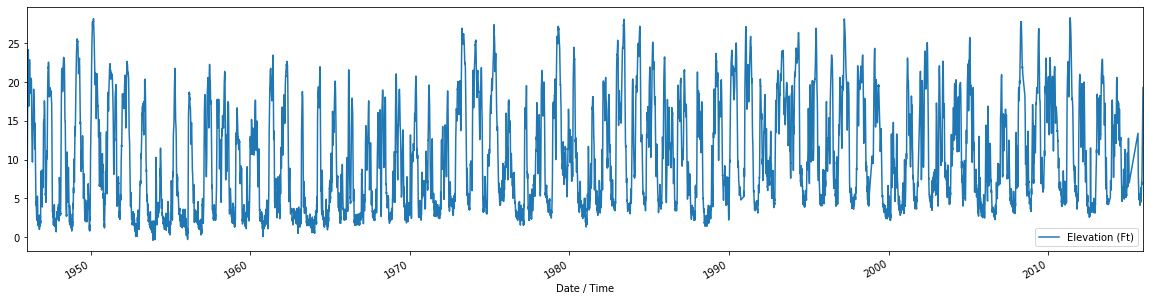

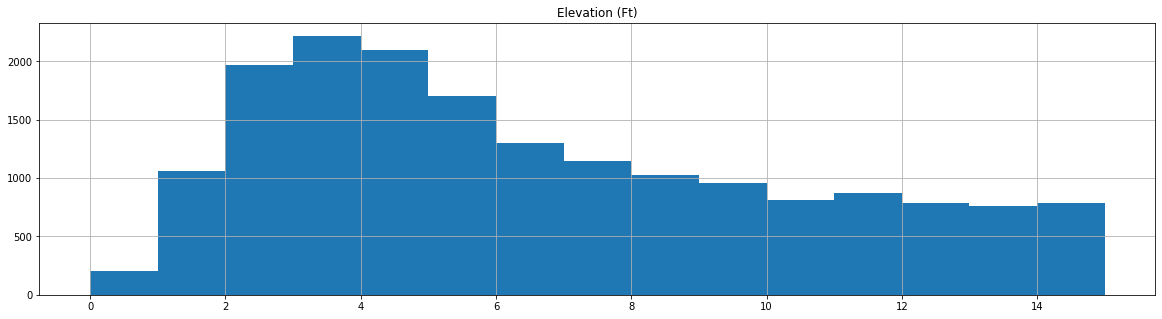

In [8]:
parent_dir = os.getcwd()

name = 'College'
xls = 'Miss_College_Point (01240).xls'
ngvd29_to_navd88 = 0
series_remove = ['M']
hist_bin = range(0,16)

college = USACE_gauge(name, xls, 'Date / Time', 'Elevation (Ft)', ngvd29_to_navd88, series_remove, hist_bin)

File Miss_Donaldsonville (01220).xls found
Miss_Donaldsonville (01220).xls
1 Stream Name: Mississippi River
2 Gage Zero: 0 Ft. GAGE
3 Flood Elevation: 27.00 Ft.
4 Record High Elevation: 36.01 Ft.
5 Unnamed: 0
6 Location of Gage:
7 Unnamed: 0
8 Mississippi River mile 173.6 on right descending bank at the CF Industries dock.
9 Unnamed: 0
10  Adjustment for vertical datum NAVD88 (OPUS 2010):  -0.88 ft.  
11 (e.g. for data relative to NAVD88 subtract 0.88 ft.)  This adjustment is only for data after 14June1988.
12 Unnamed: 0
13  To adjust NAVD88 (OPUS 2010) values to 2007 Low Water Reference Plane (LWRP) datum relative to NAVD88, subtract 1.4 ft.
14 Unnamed: 0
15  ** Raw data, subject to change **
16 Unnamed: 0
17 08:00 Central
18 Date / Time
Max:  Elevation (Ft)    31.6
dtype: float64  Min:  Elevation (Ft)    1.25
dtype: float64
bin count:  [  0  52 135 214 212 288 210 145 195 137 149 122 107 107 103]
bin divisions:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Quantiles: Q1, Q2, Q3:

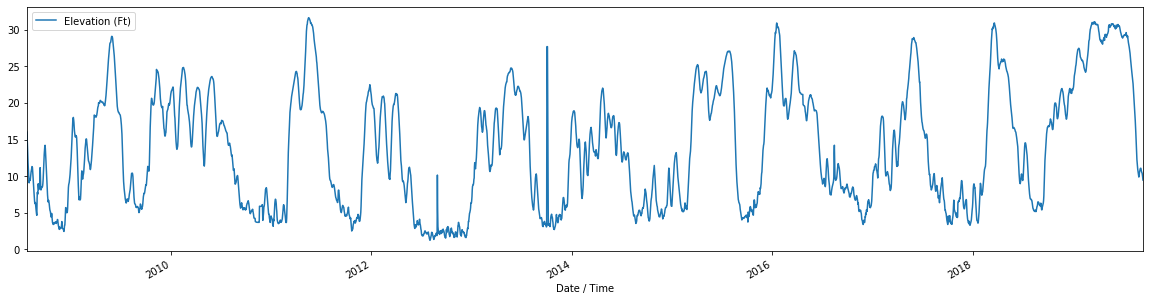

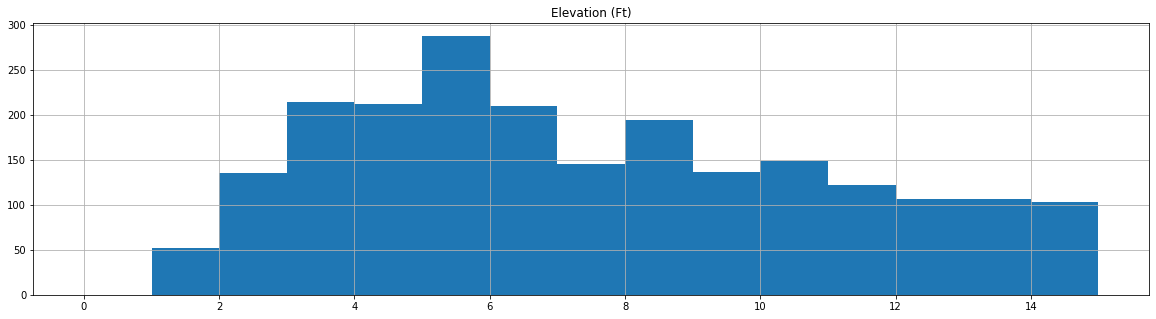

In [12]:
name = 'Donaldsonville'
xls = 'Miss_Donaldsonville (01220).xls'
ngvd29_to_navd88 = -0.88
series_remove = ['M']
hist_bin = range(0,16)

college = USACE_gauge(name, xls, 'Date / Time', 'Elevation (Ft)', ngvd29_to_navd88, series_remove, hist_bin)

File Miss_Reserve (01260).xls found
Miss_Reserve (01260).xls
1 Stream Name: Mississippi River
2 Gage Zero: 0 Ft. GAGE
3 Flood Elevation: 22.00 Ft.
4 Record High Elevation: 26.00 Ft.
5 Unnamed: 0
6 Location of Gage:
7 Unnamed: 0
8 Located on wharf on left descending bank at river mile 138.7. 
9 Unnamed: 0
10 Adjustment for vertical datum NAVD88 (OPUS 2010):  -0.76 ft.  
11 (e.g. for data relative to NAVD88 subtract 0.76 ft.)
12 Unnamed: 0
13 Note: Data values from 04Oct1991 through 14Jan1993 are 1 foot too high. Subtract 1 foot from these values before applying NAVD88 adjustment.
14 Unnamed: 0
15 To adjust NAVD88 (OPUS 2010) values to 2007 Low Water Reference Plane (LWRP) datum relative to NAVD88, subtract 1.0 ft.
16 Unnamed: 0
17   ** Raw data, subject to change **
18 Unnamed: 0
19 08:00 Central
20 Date / Time
Max:  Elevation (Ft)    33.82
dtype: float64  Min:  Elevation (Ft)    0.43
dtype: float64
bin count:  [ 20 465 705 712 680 467 499 376 332 300 253 276 312 324 317]
bin divisions:

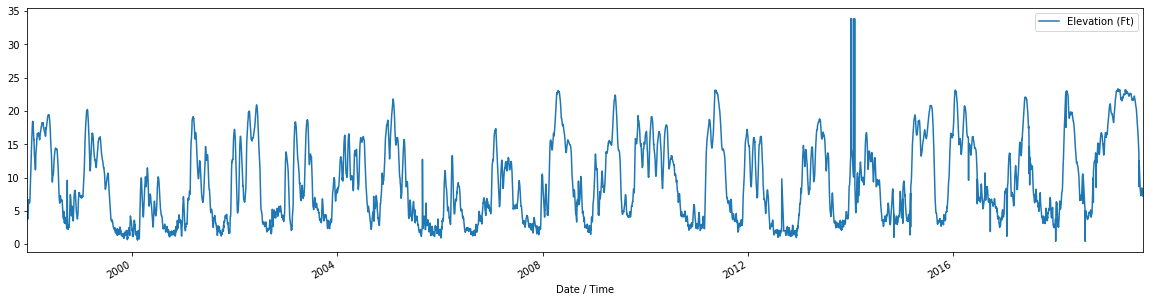

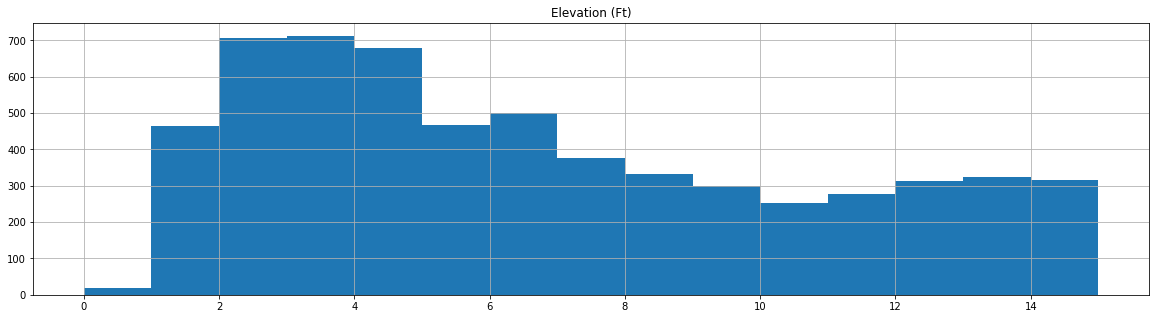

In [14]:
name = 'Reserve'
xls = 'Miss_Reserve (01260).xls'
ngvd29_to_navd88 = -0.76
series_remove = ['M']
hist_bin = range(0,16)

college = USACE_gauge(name, xls, 'Date / Time', 'Elevation (Ft)', ngvd29_to_navd88, series_remove, hist_bin)